In [1]:
import numpy as np
import matplotlib.pylab as plt
import time
from copy import deepcopy

import importlib
import matplotlib as mpl
import matplotlib.patches as mp
import pandas as pd
import torch

from pyloric import create_prior, simulate, summary_stats
from stg_energy.common import col, svg, get_labels_8pt
import stg_energy.fig1_posterior.viz as viz
from sbi.utils import pairplot

# Figure 1

In [2]:
pd.options.display.max_columns=999

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
PANEL_A = '../svg/panel_a.svg'
PANEL_B = '../svg/panel_b.svg'
PANEL_C = '../svg/panel_c.svg'
PANEL_D = '../svg/panel_d.svg'
PANEL_E = '../svg/panel_e.svg'
PANEL_F = '../svg/panel_f.svg'
PANEL_G = '../svg/panel_g.svg'
PANEL_H = '../svg/panel_h.svg'
PANEL_I = '../svg/panel_i.svg'

### Select the simulations that were close

In [5]:
path = "../../../results/simulation_data_Tube_MLslurm_cluster"
theta = pd.read_pickle(path + '/close_to_xo_circuit_parameters.pkl')
x = pd.read_pickle(path + '/close_to_xo_simulation_outputs.pkl')
seeds = np.load(path + '/close_to_xo_seeds.npy')
theta_np = theta.to_numpy()
x_np = x.to_numpy()

In [6]:
theta.to_numpy().shape

(35939, 31)

### Load samples

In [7]:
# outfile = '../../results/11deg_post_pred/11_deg_post_pred_close_to_obs.npz'
# data_n = np.load(outfile)
# sample_seeds = data_n["sample_seeds"]
# sample_params = data_n["sample_params"]
# sample_stats = data_n["sample_stats"]
# print('There are', len(sample_seeds), 'datapoints in this dataset')

# stats_mean = np.mean(sample_stats, axis=0)
# stats_std  = np.std(sample_stats, axis=0)

### Load network

In [8]:
prior = create_prior(as_torch_dist=True)
lower_bound = prior.support.lower_bound
upper_bound = prior.support.upper_bound
prior_pd = create_prior()
lims = np.asarray([lower_bound.numpy(), upper_bound.numpy()]).T
# dimensions = 31
# lims = np.asarray([-np.sqrt(3)*np.ones(dimensions), np.sqrt(3)*np.ones(dimensions)]).T

In [9]:
# params_mean = prior.mean.numpy()
# params_std = prior.stddev.numpy()

In [10]:
# sample_params_norm = (sample_params - params_mean) / params_std

# Panel B: experimental data

In [11]:
npz = np.load('../../../results/experimental_data/trace_data_845_082_0044.npz')
t = npz['t']
PD_spikes = npz['PD_spikes']
LP_spikes = npz['LP_spikes']
PY_spikes = npz['PY_spikes']
pdn = npz['pdn']
lpn = npz['lpn']
pyn = npz['pyn']

In [12]:
start_index = 219500 + 2100
end_index   = 246500 + 2100  # 32000
height_offset = 200
shown_t = t[end_index] - t[start_index]
time_len = shown_t / 0.025 * 1000
dt = t[1] - t[0]

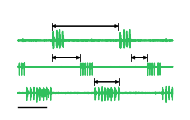

In [13]:
with mpl.rc_context(fname='../../../.matplotlibrc'):
    fig, ax = plt.subplots(1,1,figsize=(2.2, 1.3)) # (2.87, 2.08*3/4)
    ax.plot(t[start_index:end_index], 2.5+pdn[start_index:end_index]*0.007, c=col['GT'], lw=0.8)
    ax.plot(t[start_index:end_index], 1.2+lpn[start_index:end_index]*0.25, c=col['GT'], lw=0.8)
    ax.plot(t[start_index:end_index], -0.1+pyn[start_index:end_index]*0.013, c=col['GT'], lw=0.8)
    
    linew = 0.4
    headl = 0.06
    headw = 0.16
    linelen = 0.17
    circlefact = 0.8
    
    # period arrow
    height1 = 3.2
    plt.arrow(t[start_index]+0.6, height1, 1.15, 0,  shape='full', head_width=headw, head_length=headl, length_includes_head=True, color='k', lw=linew)
    plt.arrow(t[start_index]+1.75, height1, -1.15, 0,  shape='full', head_width=headw, head_length=headl, length_includes_head=True, color='k', lw=linew)
    plt.plot([t[start_index]+0.6, t[start_index]+0.6], [height1-linelen,height1+linelen], c='k', lw=linew*1.5)
    plt.plot([t[start_index]+1.75, t[start_index]+1.75], [height1-linelen,height1+linelen], c='k', lw=linew*1.5)
    #patch =mp.Ellipse((t[start_index]+1.2, 3.65), 0.2*circlefact,0.6*circlefact, color='lightgray')
    #ax.add_patch(patch)
    
    # delay arrow
    height2 = 1.64
    plt.arrow(t[start_index]+0.6, height2, 0.48, 0,  shape='full', head_width=headw, head_length=headl, length_includes_head=True, color='k', lw=linew)
    plt.arrow(t[start_index]+1.08, height2, -0.48, 0,  shape='full', head_width=headw, head_length=headl, length_includes_head=True, color='k', lw=linew)
    plt.plot([t[start_index]+0.6, t[start_index]+0.6], [height2-linelen,height2+linelen], c='k', lw=linew*1.5)
    plt.plot([t[start_index]+1.08, t[start_index]+1.08], [height2-linelen,height2+linelen], c='k', lw=linew*1.5)
    #patch =mp.Ellipse((t[start_index]+0.94, 2.1), 0.2*circlefact,0.6*circlefact, color='lightgray')
    #ax.add_patch(patch)
    
    # gap arrow
    plt.arrow(t[start_index]+1.98, height2, 0.27, 0,  shape='full', head_width=headw, head_length=headl, length_includes_head=True, color='k', lw=linew)
    plt.arrow(t[start_index]+2.25, height2, -0.27, 0,  shape='full', head_width=headw, head_length=headl, length_includes_head=True, color='k', lw=linew)
    plt.plot([t[start_index]+1.98, t[start_index]+1.98], [height2-linelen,height2+linelen], c='k', lw=linew*1.5)
    plt.plot([t[start_index]+2.25, t[start_index]+2.25], [height2-linelen,height2+linelen], c='k', lw=linew*1.5)
    #patch =mp.Ellipse((t[start_index]+2.1, 2.1), 0.2*circlefact,0.6*circlefact, color='lightgray')
    #ax.add_patch(patch)
    
    # duration arrow
    height4 = 0.44
    plt.arrow(t[start_index]+1.33, height4, 0.43, 0,  shape='full', head_width=headw, head_length=headl, length_includes_head=True, color='k', lw=linew)
    plt.arrow(t[start_index]+1.76, height4, -0.43, 0,  shape='full', head_width=headw, head_length=headl, length_includes_head=True, color='k', lw=linew)
    plt.plot([t[start_index]+1.33, t[start_index]+1.33], [height4-linelen,height4+linelen], c='k', lw=linew*1.5)
    plt.plot([t[start_index]+1.76, t[start_index]+1.76], [height4-linelen,height4+linelen], c='k', lw=linew*1.5)
    #patch =mp.Ellipse((t[start_index]+1.55, 0.9), radius=0.2, color='lightgray')
    #ax.add_patch(patch)
    

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.axes.get_yaxis().set_ticks([])
    ax.axes.get_xaxis().set_ticks([])
    ax.get_yaxis().set_visible(False)
    ax.set_ylim([-0.95, 4.0])
    
    duration = 0.5
    number_of_timesteps = int(duration / dt)
    t_scale = np.linspace(t[start_index], t[start_index + number_of_timesteps], 2)
    
    ax.plot(t_scale, -0.8 * np.ones_like(t_scale), c='k', lw=1.0)
    
    plt.savefig(PANEL_B, facecolor='None', transparent=True)
    plt.show()

# Panel C: posterior

In [14]:
# from decimal import Decimal
# all_labels = []
# for dim_i in range(31):
#     if dim_i > len(params_mean) - 7.5: # synapses
#         if dim_i == 24: all_labels.append([r'$\mathdefault{0.01}\;\;\;\;\;$ ', r'$\mathdefault{10000}\;\;\;\;$  '])
#         else: all_labels.append([r'$\;\;\mathdefault{0.01}\;\;\;\;\;$ ', r'$\mathdefault{1000}\;\;\;\;$ '])
#     else: # membrane conductances
#         num_after_digits = -int(np.log10(lims[dim_i, 1] * params_std[dim_i] + params_mean[dim_i]))
#         if num_after_digits > 2:
#             num_after_digits=2
#         labels = [round(Decimal((lims[dim_i, num_tmp] * params_std[dim_i] + params_mean[dim_i]) / 0.628e-3), num_after_digits)
#                   for num_tmp in range(2)]
#         new_labels = []
#         counter=0
#         for l in labels:
#             if counter == 0:
#                 new_labels.append(r'$\mathdefault{'+str(l)+'}\;\;\;\;\;$ ')
#             else:
#                 new_labels.append(r'$\mathdefault{'+str(l)+'}\;\;\;\;\;$ ')
#             counter+=1
#         all_labels.append(new_labels)

In [15]:
path = '../../../results/simulation_data_Tube_MLslurm_cluster/01_simulate_11deg_R3/data/all_circuit_parameters.pkl'
params_accepted_by_classifier = pd.read_pickle(path)
params_accepted_by_classifier_np = params_accepted_by_classifier.to_numpy()
# params_accepted_by_classifier_norm = (params_accepted_by_classifier_np - params_mean) / params_std

/home/michael/Documents/sbi/sbi/utils/plot.py:180: UserWarning: Importing `pairplot` from `sbi.utils` is deprecated since sbi v0.15.0. Instead, use `from sbi.analysis import pairplot`.
  warn(
/home/michael/Documents/sbi/sbi/utils/plot.py:197: UserWarning: You passed an argument `fig_size`. Since sbi v0.15.0, the argument should be called `figsize`. In future versions, `fig_size` will no longer be supported.
  warn(
/home/michael/Documents/sbi/sbi/utils/plot.py:546: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if opts["labels"] == [] or opts["labels"] is None:
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


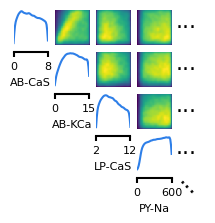

In [16]:
import matplotlib.patheffects as pe

with mpl.rc_context(fname='../../../.matplotlibrc'):

    labels_ = get_labels_8pt()
    labels_[9] += ''

    fig, axes = pairplot(samples=[params_accepted_by_classifier_np[:100000]],
                           subset=[2,4,10,16],
                           limits=lims,
                           ticks=lims,
                           fig_size=(17.0*0.12, 17.0*0.12),
                           labels=labels_,
                           scatter_offdiag={'rasterized':True, 'alpha':1.0},
                           samples_colors=[col['SNPE']],
                           diag=['kde'],
                           upper=['kde'],
                           hist_offdiag={'bins':50},
                           plot_offdiag={'linewidth': 1.6, 'path_effects':[pe.Stroke(linewidth=2.4, foreground='k'), pe.Normal()]})

    plt.savefig(PANEL_D, facecolor='None', transparent=True)
    plt.show()

/home/michael/Documents/sbi/sbi/utils/plot.py:180: UserWarning: Importing `pairplot` from `sbi.utils` is deprecated since sbi v0.15.0. Instead, use `from sbi.analysis import pairplot`.
  warn(
/home/michael/Documents/sbi/sbi/utils/plot.py:197: UserWarning: You passed an argument `fig_size`. Since sbi v0.15.0, the argument should be called `figsize`. In future versions, `fig_size` will no longer be supported.
  warn(
/home/michael/Documents/sbi/sbi/utils/plot.py:546: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if opts["labels"] == [] or opts["labels"] is None:


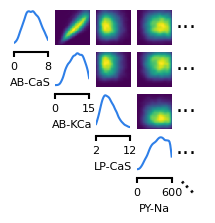

In [17]:
import matplotlib.patheffects as pe

with mpl.rc_context(fname='../../../.matplotlibrc'):

    labels_ = get_labels_8pt()
    labels_[9] += ''

    fig, axes = pairplot(samples=[theta_np[:10000]],
                           subset=[2,4,10, 16],
                           limits=lims,
                           ticks=lims,
                           fig_size=(17.0*0.12, 17.0*0.12),
                           labels=labels_,
                           scatter_offdiag={'rasterized':True, 'alpha':1.0},
                           samples_colors=[col['SNPE']],
                           diag=['kde'],
                           upper=['kde'],
                           hist_offdiag={'bins':50},
                           plot_offdiag={'linewidth': 1.6, 'path_effects':[pe.Stroke(linewidth=2.4, foreground='k'), pe.Normal()]})

    plt.savefig(PANEL_E, facecolor='None', transparent=True)
    plt.show()

# Panel D: posterior samples

In [18]:
all_traces = []
for parameter_index in range(6):
    all_traces.append(simulate(theta.loc[parameter_index], seed=int(seeds[parameter_index])))

In [19]:
time_vec = np.arange(0, 11000, 0.025)

# Panel E / F: alternative

In [47]:
torch.manual_seed(13)
trace_prior = simulate(prior_pd.sample((20,)).loc[10], seed=0)
trace_posterior = simulate(theta.loc[1], seed=int(seeds[1]))

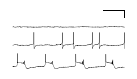

In [48]:
for ky in range(13, 14):

    fig, ax = plt.subplots(1,1,figsize=(2.2,1.2))
    viz.vis_sample_plain(
        voltage_trace=trace_prior,
        t=time_vec,
        axV=ax,
        time_len=int(time_len),
        offset=0,
        col="k",
        scale_bar=True,
        scale_bar_voltage=True,
        print_label=False,
    )
    plt.savefig(PANEL_C, facecolor='None', transparent=True, dpi=300, bbox_inches='tight')
    plt.show()

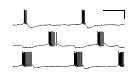

In [49]:
for kkkk in [61]: # 34, 46, 51, 61
    trace_classifier = simulate(params_accepted_by_classifier.loc[kkkk], seed=0) # 6, 11, 26
    fig, ax = plt.subplots(1,1,figsize=(2.2,1.2))
    viz.vis_sample_plain(
        voltage_trace=trace_classifier,
        t=time_vec,
        axV=ax,
        time_len=int(time_len),
        offset=0,
        col="k",
        scale_bar=True,
        scale_bar_voltage=True,
        print_label=False,
    )
    plt.savefig(PANEL_F, facecolor='None', transparent=True, dpi=300, bbox_inches='tight')
    plt.show()

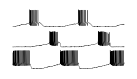

In [50]:
fig, ax = plt.subplots(1,1,figsize=(2.2,1.2))
viz.vis_sample_plain(
    voltage_trace=trace_posterior,
    t=time_vec,
    axV=ax,
    time_len=int(time_len),
    offset=45000,
    col="k",
    scale_bar=False,
    scale_bar_voltage=False,
    print_label=False,
)
plt.savefig(PANEL_G, facecolor='None', transparent=True, dpi=300, bbox_inches='tight')
plt.show()

# Histograms

In [51]:
theta = pd.read_pickle("../../../results/simulation_data_Tube_MLslurm_cluster/close_to_xo_circuit_parameters.pkl")
x = pd.read_pickle("../../../results/simulation_data_Tube_MLslurm_cluster/close_to_xo_simulation_outputs.pkl")
seeds = np.load("../../../results/simulation_data_Tube_MLslurm_cluster/close_to_xo_seeds.npy")

theta_np = theta.to_numpy()
x_np = x.to_numpy()

In [52]:
all_energies_per_spike = x["energies_per_spike"].to_numpy()
all_total_energies = x["energies"].to_numpy()

In [53]:
summed_energies_per_spike = np.sum(np.asarray(all_energies_per_spike), axis=1)
summed_energies_total = np.sum(np.asarray(all_total_energies), axis=1)

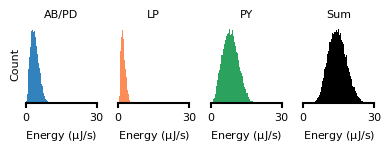

In [54]:
with mpl.rc_context(fname="../../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 4, figsize=(4.5, 1))

    # / 10 because of 10 seconds simulation_time. /1000 to go from nJ to muJ
    _ = ax[0].hist(
        all_total_energies[:, 0]/10/1000, range=[0, 30], bins=100, color="#3182bd"
    )
    ax[0].set_ylabel("Count")
    ax[0].tick_params(axis="both", which="major")
    ax[0].spines["top"].set_visible(False)
    ax[0].spines["right"].set_visible(False)
    ax[0].spines["left"].set_visible(False)
    ax[0].axes.get_yaxis().set_ticks([])
    ax[0].set_title("AB/PD")

    _ = ax[1].hist(
        all_total_energies[:, 1]/10/1000, range=[0, 30], bins=100, color="#fc8d59"
    )
    # ax[1].set_ylabel('Count')
    ax[1].tick_params(axis="both", which="major")
    ax[1].spines["top"].set_visible(False)
    ax[1].spines["right"].set_visible(False)
    ax[1].spines["left"].set_visible(False)
    ax[1].axes.get_yaxis().set_ticks([])
    ax[1].set_title("LP")

    _ = ax[2].hist(
        all_total_energies[:, 2]/10/1000, range=[0, 30], bins=100, color="#2ca25f"
    )
    # ax[2].set_ylabel('Count')
    ax[2].tick_params(axis="both", which="major")
    ax[2].spines["top"].set_visible(False)
    ax[2].spines["right"].set_visible(False)
    ax[2].spines["left"].set_visible(False)
    ax[2].axes.get_yaxis().set_ticks([])
    ax[2].set_title("PY")

    _ = ax[3].hist(summed_energies_total/10/1000, range=[0, 30], bins=100, color="k")
    # ax[3].set_ylabel('Count')
    ax[3].tick_params(axis="both", which="major")
    ax[3].spines["top"].set_visible(False)
    ax[3].spines["right"].set_visible(False)
    ax[3].spines["left"].set_visible(False)
    ax[3].axes.get_yaxis().set_ticks([])
    ax[3].set_title("Sum")

    plt.subplots_adjust(wspace=0.3)

    for i in range(4):
        ax[i].set_xlim([0, 30])
        ax[i].spines["top"].set_visible(False)
        ax[i].spines["right"].set_visible(False)
        ax[i].spines["left"].set_visible(False)
        ax[i].set_xlabel("Energy ($\mu$J/s)")
        ax[i].set_xticks([0, 30])

    plt.savefig(PANEL_H, facecolor="None", transparent=True)
    plt.show()

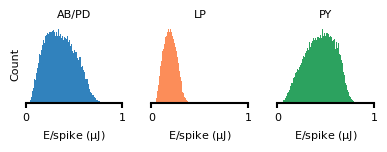

In [55]:
with mpl.rc_context(fname="../../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 3, figsize=(4.5, 1))

    # The factor /4000 comes from: 10 second recording. 0.025ms stepsize -> total energy = int_energy = energy * 0.025ms = energy / 40000
    _ = ax[0].hist(all_energies_per_spike[:, 0] / 1000, range=[0, 1], bins=100, color="#3182bd")
    ax[0].set_ylabel("Count")
    ax[0].axes.get_yaxis().set_ticks([])
    ax[0].set_title("AB/PD")

    _ = ax[1].hist(
        all_energies_per_spike[:, 1] / 1000, range=[0, 1], bins=100, color="#fc8d59"
    )
    # ax[1].set_ylabel('Count')
    ax[1].set_xlabel("E/spike")
    ax[1].axes.get_yaxis().set_ticks([])
    ax[1].set_title("LP")

    _ = ax[2].hist(all_energies_per_spike[:, 2] / 1000, range=[0, 1], bins=100, color="#2ca25f")
    # ax[2].set_ylabel('Count')
    ax[2].set_xlabel("E/spike")
    ax[2].axes.get_yaxis().set_ticks([])
    ax[2].set_title("PY")

    for i in range(3):
        ax[i].set_xlim([0, 1])
        ax[i].set_xticks([0, 1])
        ax[i].set_xlabel("E/spike ($\mu$J)")
        ax[i].spines["top"].set_visible(False)
        ax[i].spines["right"].set_visible(False)
        ax[i].spines["left"].set_visible(False)

    plt.subplots_adjust(wspace=0.3)

    plt.savefig(PANEL_I, facecolor="None", transparent=True)
    plt.show()

# Assemble figure

In [56]:
color_mixture1 = 0.33 * np.asarray(list(col['CONSISTENT1'])) + 0.67 * np.asarray(
    list(col['CONSISTENT2']))
color_mixture2 = 0.67 * np.asarray(list(col['CONSISTENT1'])) + 0.33 * np.asarray(
    list(col['CONSISTENT2']))

In [57]:
import time
import IPython.display as IPd

def svg(img):
    IPd.display(IPd.HTML('<img src="{}" / >'.format(img, time.time())))

In [58]:
from svgutils.compose import *

# > Inkscape pixel is 1/90 of an inch, other software usually uses 1/72.
# > http://www.inkscapeforum.com/viewtopic.php?f=6&t=5964
svg_scale = 1.25  # set this to 1.25 for Inkscape, 1.0 otherwise
factor_svg=5.5

# Panel letters in Helvetica Neue, 12pt, Medium
kwargs_text = {'size': '12pt', 'font': 'Arial', 'weight': '800'}
kwargs_consistent = {'size': '10pt', 'font': 'Arial', 'weight': '500', 'color': '#AF99EF'}
kwargs_consistent1 = {'size': '10pt', 'font': 'Arial', 'weight': '500', 'color': '#9E7DD5'}
kwargs_inconsistent = {'size': '10pt', 'font': 'Arial', 'weight': '500', 'color': '#AF99EF'}
kwargs_text8pt = {'size': '7.7pt', 'font': 'Arial'}

startx1 = 492
startx2 = 594
starty1 = 204
starty2 = 307

endx1 = 642
endx2 = 673
endy1 = 159
endy2 = 191

deltax1 =  endx1-startx1
deltax2 =  endx2-startx2
deltay1 =  endy1-starty1
deltay2 =  endy2-starty2

sizefactor = 1.0
dshift = 0.5*factor_svg

f = Figure("20.3cm", "14.1cm",
           
    Panel(
          SVG(PANEL_A).scale(svg_scale*1.03).move(0*factor_svg, 0*factor_svg),
          Text("a", -5*factor_svg, 2.0*factor_svg-dshift, **kwargs_text),
    ).move(5*factor_svg, 0*factor_svg+dshift),

    Panel(
        SVG(PANEL_B).scale(svg_scale).move(0*factor_svg, 0*factor_svg),
        Text("b", -2.0*factor_svg, 3.5*factor_svg-dshift, **kwargs_text),
        Text("PD", -1.*factor_svg, 7.2*factor_svg, **kwargs_text8pt),
        Text("LP", -1.*factor_svg, 11.6*factor_svg, **kwargs_text8pt),
        Text("PY", -1.*factor_svg, 15.8*factor_svg, **kwargs_text8pt),
        Text("1", 13.8*factor_svg, 3.8*factor_svg, **kwargs_text8pt),
        Text("2", 10.4*factor_svg, 9.0*factor_svg, **kwargs_text8pt),
        Text("3", 22.35*factor_svg, 9.0*factor_svg, **kwargs_text8pt),
        Text("4", 17.0*factor_svg, 12.8*factor_svg, **kwargs_text8pt),
    ).move(3.0*factor_svg, 180-1.5*factor_svg+dshift),
           
    Panel(
          SVG(PANEL_C).scale(svg_scale).move(0*factor_svg, 0*factor_svg),
          Text("c", -3*factor_svg, 3.5*factor_svg-dshift, **kwargs_text),
    ).move(3*factor_svg, 180+19.5*factor_svg+dshift),
           
    Panel(
          SVG(PANEL_D).scale(svg_scale).move(-10*factor_svg,0*factor_svg),
          Text("d", -10.5*factor_svg, 1.5*factor_svg-dshift, **kwargs_text),
    ).move(45.5*factor_svg, 180+0.5*factor_svg+dshift),

    Panel(
          SVG(PANEL_E).scale(svg_scale).move(-10*factor_svg,0*factor_svg),
          Text("e", -10.5*factor_svg, 1.5*factor_svg-dshift, **kwargs_text),
    ).move(83.5*factor_svg, 180+0.5*factor_svg+dshift),

    Panel(
          SVG(PANEL_F).scale(svg_scale).move(0*factor_svg, 0*factor_svg),
          Text("f", 0*factor_svg, 1.5*factor_svg-dshift, **kwargs_text),
    ).move(111*factor_svg, 180+0.5*factor_svg+dshift),

   Panel(
          SVG(PANEL_G).scale(svg_scale).move(0*factor_svg, 0*factor_svg),
          Text("g", 0*factor_svg, 3.5*factor_svg-dshift, **kwargs_text),
    ).move(111*factor_svg, 180+19.5*factor_svg+dshift),

    Panel(
          SVG(PANEL_H).scale(svg_scale).move(0*factor_svg, 0*factor_svg),
          Text("h", -3*factor_svg, 3.5*factor_svg-dshift, **kwargs_text),
    ).move(3*factor_svg, 180+40.5*factor_svg+dshift),

    Panel(
          SVG(PANEL_I).scale(svg_scale).move(0*factor_svg, 0*factor_svg),
          Text("i", -3*factor_svg, 3.5*factor_svg-dshift, **kwargs_text),
    ).move(76*factor_svg, 180+40.5*factor_svg+dshift)
)

!mkdir -p fig
f.save("../fig/fig2.svg")
svg('../fig/fig2.svg')

### Supplementary: quantitative comparison between simulation-informed prior and posterior

In [59]:
from stg_energy.common import reorder_stats

In [60]:
PANEL_prior_stats = '../svg/panel_prior_stats.svg'
PANEL_sim_inf_prior_stats = '../svg/panel_sim_inf_prior_stats.svg'
PANEL_post_stats = '../svg/panel_post_stats.svg'

In [61]:
names = []
for num in range(15):
    names.append(viz.get_summ_stat_name_text(num))

In [62]:
num_sims = 500

In [63]:
path = "../../../results/simulation_data_Tube_MLslurm_cluster/01_simulate_11deg"
x_prior = pd.read_pickle(path + "/data/valid_simulation_outputs.pkl")
x_prior_np = x_prior.to_numpy()

x_prior_np = reorder_stats(x_prior_np)

stats_mean = np.mean(x_prior_np, axis=0)
stats_std = np.std(x_prior_np, axis=0)

In [64]:
xo = np.load("../../../results/experimental_data/xo_11deg.npy")
xo = reorder_stats(xo)[0]

### Prior

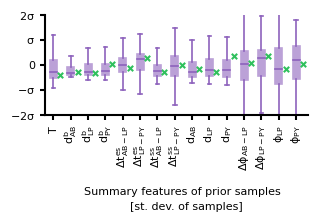

In [66]:
import seaborn as sns
import pandas as pd

norm_ss = (np.asarray(x_prior_np)[:num_sims,:15]-stats_mean[:15])/stats_std[:15]

with mpl.rc_context(fname='../../../.matplotlibrc'):
    fig, ax = plt.subplots(1, 1, figsize=(3.4*1.0, 1.3))
    plt.scatter(np.arange(15)+0.4, (xo[:15]-stats_mean[:15])/stats_std[:15], marker='x', s=15.0, color=col['GT'])
    df = pd.DataFrame(np.asarray(norm_ss))

    box = sns.boxplot(data=df, width=0.4, fliersize=.0, linewidth=1.2) # , color='#0570b0'
    for i, patch in enumerate(box.artists):
        r, g, b, a = patch.get_facecolor() # r, g, b, a = patch.get_facecolor()
        patch.set_facecolor(1-((1-np.asarray(col['CONSISTENT1'])))*0.6) # patch.set_facecolor((r, g, b, .6))
        patch.set_edgecolor(1-((1-np.asarray(col['CONSISTENT1'])))*0.6) # WANT A BRIGHTER ONE!
        for j in range(i*6,i*6+6):
            line = ax.lines[j]
            line.set_color(col['CONSISTENT1'])
            line.set_mfc(col['CONSISTENT1'])
            line.set_mec(col['CONSISTENT1'])
            
    ax.set_ylim([-2,2])
    ax.set_xlim([-0.5,14.7])
    ax.set_xticklabels(names, rotation='vertical')
    ax.set_yticks([-2, -1, 0, 1, 2])
    ax.set_yticklabels(['$\mathdefault{-2} \sigma$', '$\mathdefault{-}\sigma$', '0', '$\sigma$', '$\mathdefault{2} \sigma$'])
    ax.text(0.15,  -0.8, 'Summary features of prior samples', transform=ax.transAxes)
    ax.text(0.322, -0.95, '[st. dev. of samples]', transform=ax.transAxes)
    plt.savefig(PANEL_prior_stats, facecolor='None', transparent=True, dpi=300, bbox_inches='tight')
    plt.show()

### Simulation-informed prior

In [67]:
path = '../../../results/simulation_data_Tube_MLslurm_cluster/01_simulate_11deg_R3/data/valid_simulation_outputs.pkl'
classifier_predictives = pd.read_pickle(path)
classifier_predictives_np = classifier_predictives.to_numpy()
classifier_predictives_np = reorder_stats(classifier_predictives_np)

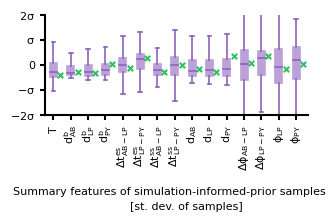

In [68]:
# import seaborn as sns
import pandas as pd

norm_ss = (np.asarray(classifier_predictives_np)[:,:15]-stats_mean[:15])/stats_std[:15]

with mpl.rc_context(fname='../../../.matplotlibrc'):
    fig, ax = plt.subplots(1,1, figsize=(3.4*1., 1.3))
    plt.scatter(np.arange(15)+0.4, (xo[:15]-stats_mean[:15])/stats_std[:15], marker='x', s=15.0, color=col['GT'])
    df = pd.DataFrame(np.asarray(norm_ss))

    box = sns.boxplot(data=df, width=0.4, fliersize=.0, linewidth=1.2) # , color='#0570b0'
    for i, patch in enumerate(box.artists):
        r, g, b, a = patch.get_facecolor() # r, g, b, a = patch.get_facecolor()
        patch.set_facecolor(1-((1-np.asarray(col['CONSISTENT1'])))*0.6) # patch.set_facecolor((r, g, b, .6))
        patch.set_edgecolor(1-((1-np.asarray(col['CONSISTENT1'])))*0.6) # WANT A BRIGHTER ONE!
        for j in range(i*6,i*6+6):
            line = ax.lines[j]
            line.set_color(col['CONSISTENT1'])
            line.set_mfc(col['CONSISTENT1'])
            line.set_mec(col['CONSISTENT1'])
        
    ax.set_ylim([-2,2])
    ax.set_xlim([-0.5,14.7])
    ax.set_xticklabels(names, rotation='vertical')
    ax.set_yticks([-2, -1, 0, 1, 2])
    ax.set_yticklabels(['$\mathdefault{-2} \sigma$', '$\mathdefault{-}\sigma$', '0', '$\sigma$', '$\mathdefault{2} \sigma$'])
    ax.text(-0.12,  -0.8, 'Summary features of simulation-informed-prior samples', transform=ax.transAxes)
    ax.text(0.322, -0.95, '[st. dev. of samples]', transform=ax.transAxes)
    plt.savefig(PANEL_sim_inf_prior_stats, facecolor='None', transparent=True, dpi=300, bbox_inches='tight')
    plt.show()

### Posterior

In [69]:
path = '../../../results/simulation_data_Tube_MLslurm_cluster/simulate_11deg_R3_predictives_at_11deg/data/valid_simulation_outputs.pkl'
posterior_predictives = pd.read_pickle(path)
posterior_predictives_np = posterior_predictives.to_numpy()
posterior_predictives_np = reorder_stats(posterior_predictives_np)

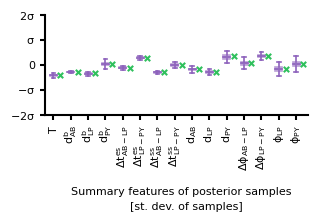

In [70]:
import seaborn as sns
import pandas as pd

norm_ss = (np.asarray(posterior_predictives_np)[:,:15]-stats_mean[:15])/stats_std[:15]

with mpl.rc_context(fname='../../../.matplotlibrc'):
    fig, ax = plt.subplots(1,1, figsize=(3.4*1.0, 1.3))
    plt.scatter(np.arange(15)+0.4, (xo[:15]-stats_mean[:15])/stats_std[:15], marker='x', s=15.0, color=col['GT'])
    df = pd.DataFrame(np.asarray(norm_ss))

    box = sns.boxplot(data=df, width=0.4, fliersize=.0, linewidth=1.2) # , color='#0570b0'
    for i, patch in enumerate(box.artists):
        r, g, b, a = patch.get_facecolor() # r, g, b, a = patch.get_facecolor()
        patch.set_facecolor(1-((1-np.asarray(col['CONSISTENT1'])))*0.6) # patch.set_facecolor((r, g, b, .6))
        patch.set_edgecolor(1-((1-np.asarray(col['CONSISTENT1'])))*0.6) # WANT A BRIGHTER ONE!
        for j in range(i*6,i*6+6):
            line = ax.lines[j]
            line.set_color(col['CONSISTENT1'])
            line.set_mfc(col['CONSISTENT1'])
            line.set_mec(col['CONSISTENT1'])
            
    ax.set_ylim([-2,2])
    ax.set_xlim([-0.5,14.7])
    ax.set_xticklabels(names, rotation='vertical')
    ax.set_yticks([-2, -1, 0, 1, 2])
    ax.set_yticklabels(['$\mathdefault{-2} \sigma$', '$\mathdefault{-}\sigma$', '0', '$\sigma$', '$\mathdefault{2} \sigma$'])
    ax.text(0.10,  -0.8, 'Summary features of posterior samples', transform=ax.transAxes)
    ax.text(0.322, -0.95, '[st. dev. of samples]', transform=ax.transAxes)
    plt.savefig(PANEL_post_stats, facecolor='None', transparent=True, dpi=300, bbox_inches='tight')
    plt.show()

### Assemble figure

In [71]:
from svgutils.compose import *

# > Inkscape pixel is 1/90 of an inch, other software usually uses 1/72.
# > http://www.inkscapeforum.com/viewtopic.php?f=6&t=5964
svg_scale = 1.25  # set this to 1.25 for Inkscape, 1.0 otherwise
factor_svg=5.5

# Panel letters in Helvetica Neue, 12pt, Medium
kwargs_text = {'size': '12pt', 'font': 'Arial', 'weight': '800'}
kwargs_consistent = {'size': '10pt', 'font': 'Arial', 'weight': '500', 'color': '#AF99EF'}
kwargs_consistent1 = {'size': '10pt', 'font': 'Arial', 'weight': '500', 'color': '#9E7DD5'}
kwargs_inconsistent = {'size': '10pt', 'font': 'Arial', 'weight': '500', 'color': '#AF99EF'}
kwargs_text8pt = {'size': '7.7pt', 'font': 'Arial'}

startx1 = 492
startx2 = 594
starty1 = 204
starty2 = 307

endx1 = 642
endx2 = 673
endy1 = 159
endy2 = 191

deltax1 =  endx1-startx1
deltax2 =  endx2-startx2
deltay1 =  endy1-starty1
deltay2 =  endy2-starty2

sizefactor = 1.0
dshift = 0.5*factor_svg

f = Figure("20.3cm", "4.7cm",
           
    Panel(
          SVG(PANEL_prior_stats).scale(svg_scale).scale(0.9).move(0, 15*factor_svg),
    ).move(0*factor_svg, -14.4*factor_svg+dshift),
           
    Panel(
          SVG(PANEL_sim_inf_prior_stats).scale(svg_scale).scale(0.9).move(0, 15*factor_svg),
    ).move(47*factor_svg, -14.4*factor_svg+dshift),

    Panel(
          SVG(PANEL_post_stats).scale(svg_scale).scale(0.9).move(0, 15*factor_svg),
    ).move(94*factor_svg, -14.4*factor_svg+dshift),
)

!mkdir -p fig
f.save("../fig/fig2_supp3.svg")
svg('../fig/fig2_supp3.svg')